# Exercise: Outlier Detection and Removal Using IQR

You are given height_weight.csv file which contains heights and weights of 1000 people. Dataset is taken from here, https://www.kaggle.com/mustafaali96/weight-height

You need to do this,

(1) Load this csv in pandas dataframe and first plot histograms for height and weight parameters

(2) Using IQR detect weight outliers and print them

(3) Using IQR, detect height outliers and print them

In [1]:
import pandas as pd
import seaborn as sa
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8,4)

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/3_outlier_IQR/Exercise/height_weight.csv")
df.head(5)

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<AxesSubplot:xlabel='weight', ylabel='Count'>

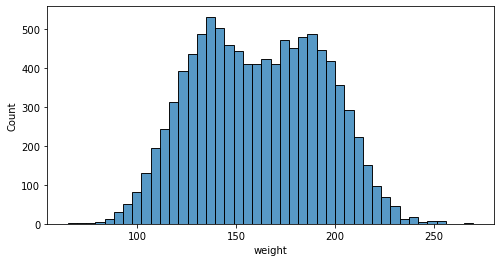

In [7]:
sa.histplot(df['weight'], kde=False)

<AxesSubplot:xlabel='weight', ylabel='Count'>

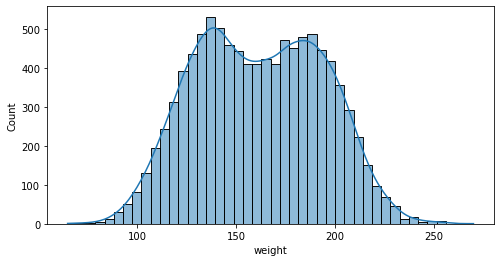

In [8]:
sa.histplot(df['weight'], kde=True)

<AxesSubplot:xlabel='height', ylabel='Count'>

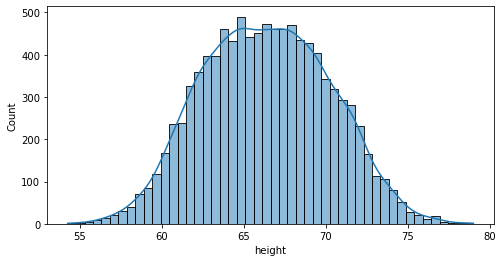

In [10]:
sa.histplot(df['height'], kde=True)

**Histgram for weights**



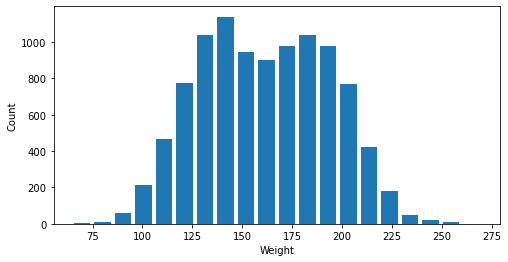

In [11]:
plt.hist(df.weight, bins=20, rwidth=0.8)
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

**Histgram for heights**

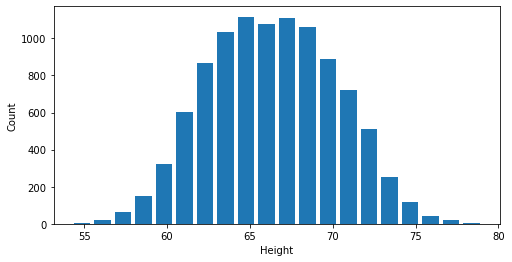

In [12]:
plt.hist(df.height, bins=20, rwidth=0.8)
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()

**Detect outliers based on weight**

In [17]:
Q1 = df.weight.quantile(0.25)
Q3 = df.weight.quantile(0.75)
Q1, Q3

(135.8180513055015, 187.16952486868348)

In [18]:
IQR = Q3 - Q1
IQR

51.35147356318197

In [19]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(58.79084096072856, 264.19673521345646)

In [20]:
df.weight.describe()


count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: weight, dtype: float64

In [21]:
df[(df.weight<lower_limit)|(df.weight>upper_limit)]


,gender,height,weight
2014,Male,78.998742,269.989699


**Detect outliers based on height**

In [22]:
Q1 = df.height.quantile(0.25)
Q3 = df.height.quantile(0.75)
Q1, Q3

(63.505620481218955, 69.1742617268347)

In [23]:
IQR = Q3 - Q1
IQR

5.668641245615746

In [24]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(55.00265861279534, 77.67722359525831)

In [25]:
df[(df.height<lower_limit)|(df.height>upper_limit)]


,gender,height,weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


In [27]:
df[(df.height>lower_limit) & (df.height<upper_limit)]


,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
